# Reinforcement Learning Project

## Environment - Lunar Lander

**Action Space**

There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

**Observation Space**

The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

**Rewards**

Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. __Solved is 200 points__.

**Starting State**

The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

**Episode Termination**

The episode finishes if:

- The lander crashes (the lander body gets in contact with the moon);

- The lander gets outside of the viewport (x coordinate is greater than 1);

- The lander is not awake.

**Version**
- V3

[More Information Here](https://www.gymlibrary.dev/environments/box2d/lunar_lander/)

## Libraries

In [1]:
import gymnasium as gym
import numpy as np
from typing import Callable, List, Optional
import matplotlib.pyplot as plt
from stable_baselines3 import DQN, A2C, PPO
from stable_baselines3.common.evaluation import evaluate_policy

from utils import *

## Environment

In [2]:
env = gym.make("LunarLander-v3")#, render_mode="human") 

/Users/antoniooliveira/Documents/GitHub/RL_project/venv/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


## Solving the Environment

### Random Agent

[LOG] Episode 1 - Reward: -346.76
[LOG] Episode 2 - Reward: -332.07
[LOG] Episode 3 - Reward: -151.43
[LOG] Episode 4 - Reward: -151.74
[LOG] Episode 5 - Reward: -277.10
[LOG] Episode 6 - Reward: -65.79
[LOG] Episode 7 - Reward: -85.64
[LOG] Episode 8 - Reward: -284.32
[LOG] Episode 9 - Reward: -90.53
[LOG] Episode 10 - Reward: -130.93
[LOG] Episode 11 - Reward: -80.21
[LOG] Episode 12 - Reward: -102.77
[LOG] Episode 13 - Reward: -99.97
[LOG] Episode 14 - Reward: -281.64
[LOG] Episode 15 - Reward: -214.96
[LOG] Episode 16 - Reward: -109.88
[LOG] Episode 17 - Reward: -118.57
[LOG] Episode 18 - Reward: -103.75
[LOG] Episode 19 - Reward: -127.25
[LOG] Episode 20 - Reward: -119.07
[LOG] Episode 21 - Reward: -229.38
[LOG] Episode 22 - Reward: -196.36
[LOG] Episode 23 - Reward: -425.50
[LOG] Episode 24 - Reward: -58.32
[LOG] Episode 25 - Reward: -98.66
[LOG] Episode 26 - Reward: 17.41
[LOG] Episode 27 - Reward: 36.82
[LOG] Episode 28 - Reward: -379.85
[LOG] Episode 29 - Reward: -258.01
[LOG]

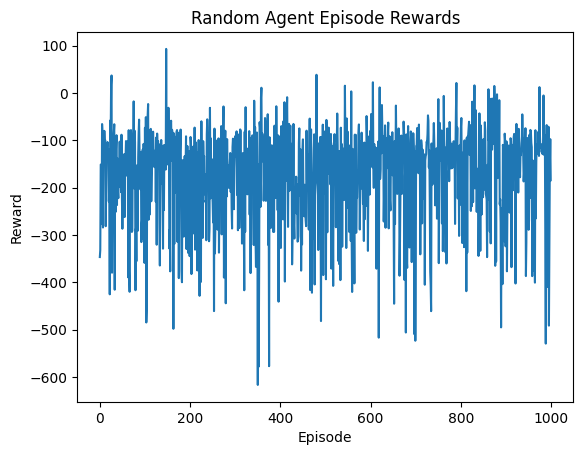

In [6]:
# render --> se quisermos ver a cena a funcionar
rewards_ra = run_agent(episodes=1000, seed=42, log_fn=my_logger, render=False)

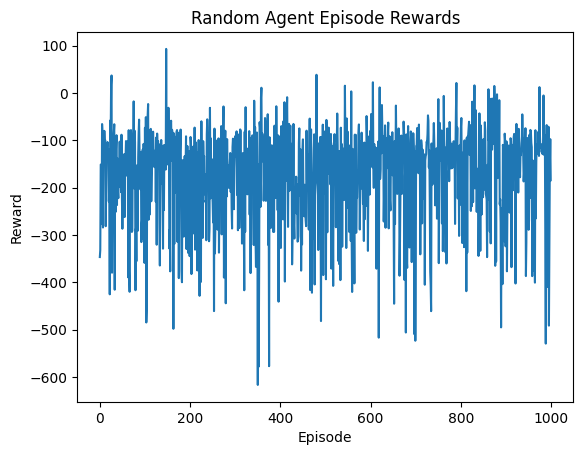

In [9]:
plt.plot(rewards_ra)
plt.title("Random Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### Rule-Based Agent

In [10]:
rewards_rb = run_agent(episodes=1000, render=False, seed=1,
                    log_fn = None,
                    agent_fn=rule_based_action)

Episode 1 - Total Reward: -627.54
Episode 2 - Total Reward: -484.33
Episode 3 - Total Reward: -538.49
Episode 4 - Total Reward: -604.53
Episode 5 - Total Reward: -617.20
Episode 6 - Total Reward: -618.19
Episode 7 - Total Reward: -556.49
Episode 8 - Total Reward: -246.63
Episode 9 - Total Reward: -545.36
Episode 10 - Total Reward: -514.74
Episode 11 - Total Reward: -505.03
Episode 12 - Total Reward: -472.07
Episode 13 - Total Reward: -250.46
Episode 14 - Total Reward: -577.35
Episode 15 - Total Reward: -582.02
Episode 16 - Total Reward: -611.03
Episode 17 - Total Reward: -553.99
Episode 18 - Total Reward: -496.96
Episode 19 - Total Reward: -584.85
Episode 20 - Total Reward: -122.91
Episode 21 - Total Reward: -614.18
Episode 22 - Total Reward: -578.23
Episode 23 - Total Reward: -608.36
Episode 24 - Total Reward: -496.53
Episode 25 - Total Reward: -585.02
Episode 26 - Total Reward: -549.85
Episode 27 - Total Reward: -573.30
Episode 28 - Total Reward: -614.23
Episode 29 - Total Reward: -4

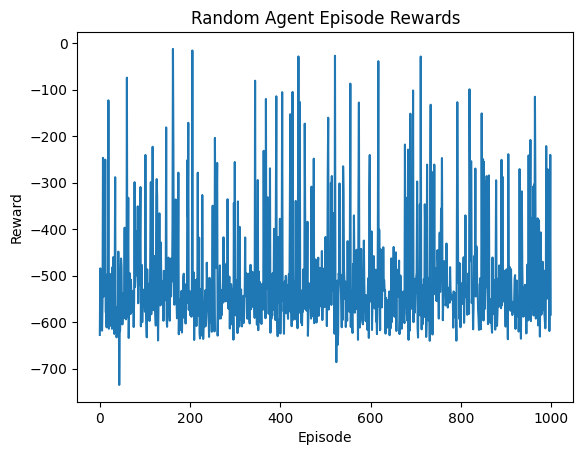

In [11]:
plt.plot(rewards_rb)
plt.title("Random Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### DQN

In [14]:
model = DQN("MlpPolicy", env, verbose=1, seed=42)

timestamps = 100_000

model.learn(total_timesteps=timestamps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91       |
|    ep_rew_mean      | -208     |
|    exploration_rate | 0.965    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2043     |
|    time_elapsed     | 0        |
|    total_timesteps  | 364      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.14     |
|    n_updates        | 65       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.9     |
|    ep_rew_mean      | -156     |
|    exploration_rate | 0.932    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1840     |
|    time_elapsed     | 0        |
|    total_timesteps  | 711      |
| train/              |        

In [15]:
episodes = 1000

rewards_dqn = run_episodes(model, env, n_episodes=episodes)

Episode 1: Reward = 147.57
Episode 2: Reward = -100.30
Episode 3: Reward = -290.26
Episode 4: Reward = 191.68
Episode 5: Reward = -214.85
Episode 6: Reward = 94.67
Episode 7: Reward = 226.84
Episode 8: Reward = -121.59
Episode 9: Reward = 101.84
Episode 10: Reward = 116.62
Episode 11: Reward = -56.80
Episode 12: Reward = -130.10
Episode 13: Reward = 115.55
Episode 14: Reward = -134.15
Episode 15: Reward = -128.46
Episode 16: Reward = -260.58
Episode 17: Reward = -116.11
Episode 18: Reward = -206.28
Episode 19: Reward = 231.12
Episode 20: Reward = -116.23
Episode 21: Reward = -137.74
Episode 22: Reward = -114.06
Episode 23: Reward = -127.15
Episode 24: Reward = -73.08
Episode 25: Reward = 97.55
Episode 26: Reward = -138.06
Episode 27: Reward = -131.79
Episode 28: Reward = 71.13
Episode 29: Reward = -106.08
Episode 30: Reward = -114.58
Episode 31: Reward = 171.34
Episode 32: Reward = 83.23
Episode 33: Reward = -124.36
Episode 34: Reward = 194.60
Episode 35: Reward = -60.83
Episode 36: Re

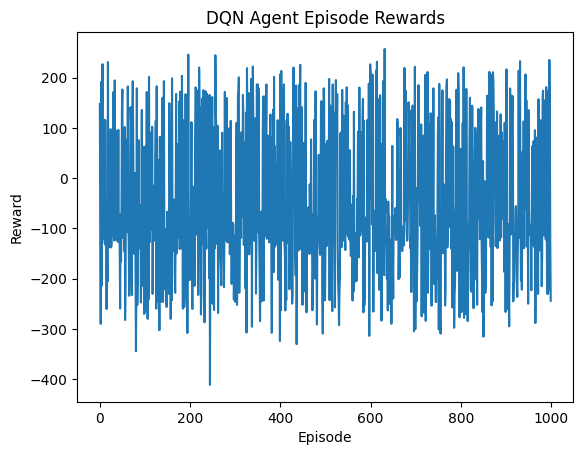

In [16]:
plt.plot(rewards_dqn)
plt.title("DQN Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

In [19]:
#model.save(f"./models/lunar_lander/dqn_{timestamps}_after_{episodes}")
#loaded_model = DQN.load("./models/lunar_lander/dqn_{timestamps}_after_{episodes}", env=env)


### A2C

In [17]:
model = A2C("MlpPolicy", env, verbose=1, seed=42)

timestamps = 100_000

model.learn(total_timesteps=timestamps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 114      |
|    ep_rew_mean        | -225     |
| time/                 |          |
|    fps                | 1037     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.34    |
|    explained_variance | -0.0237  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -6.58    |
|    value_loss         | 43       |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 128      |
|    ep_rew_mean        | -258     |
| time/                 |          |
|    fps                | 1045     |
|    iterations         | 200      |
|    time_elapsed 

In [18]:
episodes = 1000

rewards_a2c = run_episodes(model, env, n_episodes=episodes)

Episode 1: Reward = -30.48
Episode 2: Reward = -159.76
Episode 3: Reward = -28.48
Episode 4: Reward = 215.15
Episode 5: Reward = -53.69
Episode 6: Reward = 22.67
Episode 7: Reward = 0.87
Episode 8: Reward = 28.68
Episode 9: Reward = -25.43
Episode 10: Reward = -85.77
Episode 11: Reward = -113.76
Episode 12: Reward = -203.84
Episode 13: Reward = -16.22
Episode 14: Reward = -57.99
Episode 15: Reward = 234.28
Episode 16: Reward = -175.69
Episode 17: Reward = 203.39
Episode 18: Reward = 228.82
Episode 19: Reward = -59.20
Episode 20: Reward = -7.64
Episode 21: Reward = -14.61
Episode 22: Reward = -0.37
Episode 23: Reward = 11.04
Episode 24: Reward = 12.15
Episode 25: Reward = -17.34
Episode 26: Reward = -83.44
Episode 27: Reward = 64.44
Episode 28: Reward = -92.05
Episode 29: Reward = -128.84
Episode 30: Reward = -9.18
Episode 31: Reward = -1.12
Episode 32: Reward = 159.76
Episode 33: Reward = 180.38
Episode 34: Reward = -30.08
Episode 35: Reward = -67.96
Episode 36: Reward = -52.05
Episode

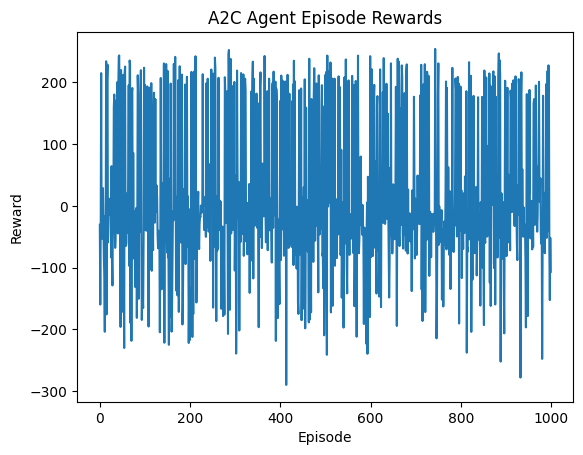

In [19]:
plt.plot(rewards_a2c)
plt.title("A2C Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### PPO

In [20]:
model = PPO("MlpPolicy", env, verbose=1, seed=42)

timestamps = 100_000

model.learn(total_timesteps=timestamps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 94.8     |
|    ep_rew_mean     | -190     |
| time/              |          |
|    fps             | 2080     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 95          |
|    ep_rew_mean          | -168        |
| time/                   |             |
|    fps                  | 1465        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004195164 |
|    clip_fraction        | 0.00732     |
|    clip_range           | 0.2         |
|    entropy_loss   

In [21]:
episodes = 1000

rewards_ppo = run_episodes(model, env, n_episodes=episodes)

Episode 1: Reward = -90.54
Episode 2: Reward = -152.69
Episode 3: Reward = -121.50
Episode 4: Reward = -138.88
Episode 5: Reward = -125.91
Episode 6: Reward = -125.53
Episode 7: Reward = -135.21
Episode 8: Reward = -105.28
Episode 9: Reward = -87.78
Episode 10: Reward = -72.22
Episode 11: Reward = -44.05
Episode 12: Reward = -89.42
Episode 13: Reward = -98.04
Episode 14: Reward = -73.74
Episode 15: Reward = -111.88
Episode 16: Reward = -96.08
Episode 17: Reward = -86.79
Episode 18: Reward = -126.54
Episode 19: Reward = -100.25
Episode 20: Reward = -129.94
Episode 21: Reward = -81.09
Episode 22: Reward = -97.12
Episode 23: Reward = -62.90
Episode 24: Reward = -82.94
Episode 25: Reward = -116.55
Episode 26: Reward = -104.31
Episode 27: Reward = -146.09
Episode 28: Reward = -69.07
Episode 29: Reward = -100.66
Episode 30: Reward = -116.76
Episode 31: Reward = -91.56
Episode 32: Reward = -136.51
Episode 33: Reward = -89.36
Episode 34: Reward = -69.29
Episode 35: Reward = -120.73
Episode 36:

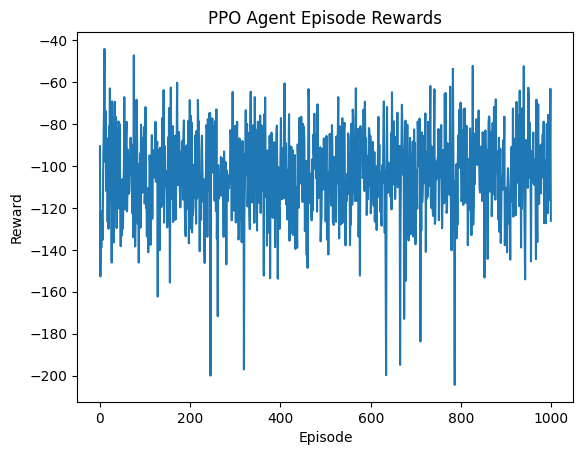

In [22]:
plt.plot(rewards_ppo)
plt.title("PPO Agent Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

### Performance Comparison

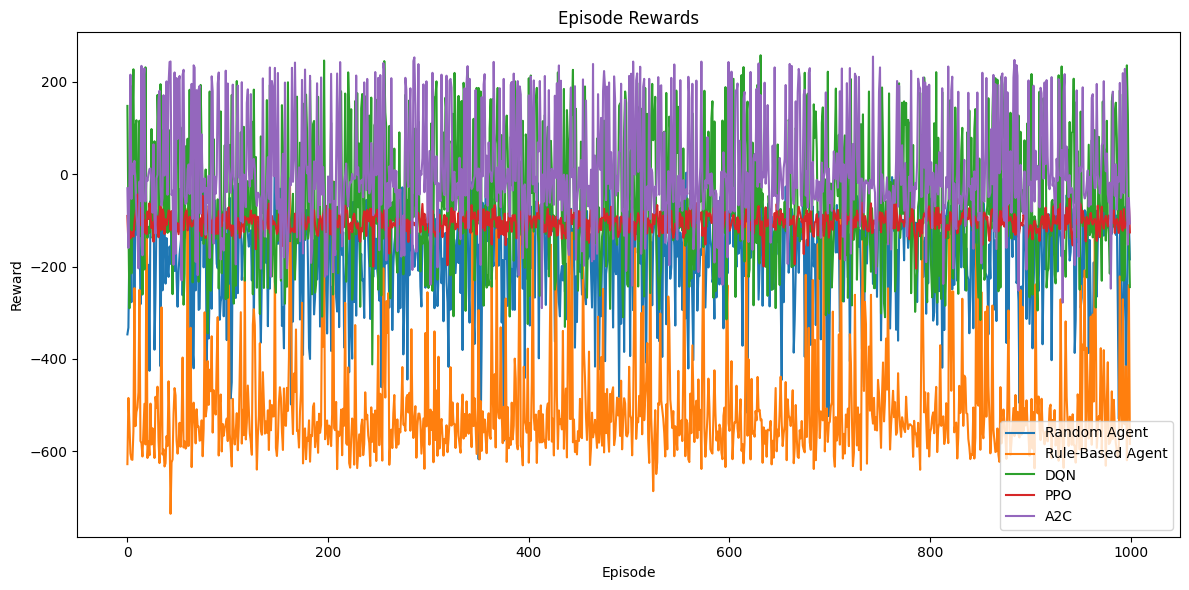

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(rewards_ra, label='Random Agent')
plt.plot(rewards_rb, label='Rule-Based Agent')
plt.plot(rewards_dqn, label="DQN")
plt.plot(rewards_ppo, label="PPO")
plt.plot(rewards_a2c, label="A2C")
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.tight_layout()
plt.show()


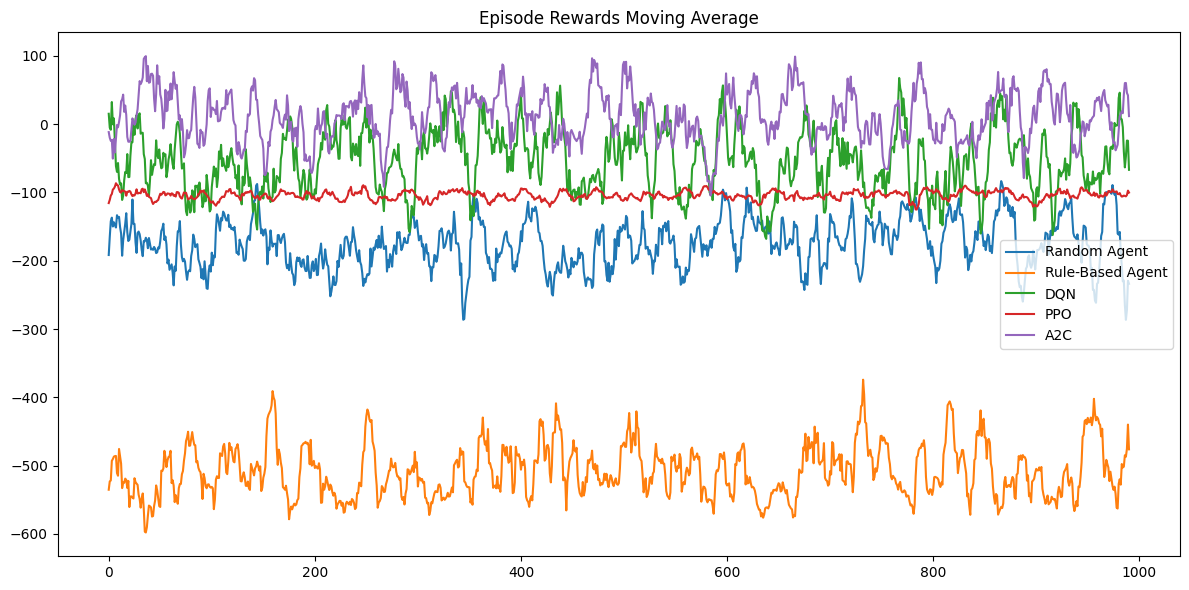

In [32]:
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot smoothed rewards
plt.figure(figsize=(12, 6))
plt.title("Episode Rewards Moving Average")
plt.plot(moving_average(rewards_ra), label='Random Agent')
plt.plot(moving_average(rewards_rb), label='Rule-Based Agent')
plt.plot(moving_average(rewards_dqn), label="DQN")
plt.plot(moving_average(rewards_ppo), label="PPO")
plt.plot(moving_average(rewards_a2c), label="A2C")
plt.legend()
plt.tight_layout()
plt.show()